## RNN_Mnist

In [1]:
# 導入函式庫
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense
# from keras.optimizers import Adam

# 固定亂數種子，使每次執行產生的亂數都一樣
np.random.seed(1337)

# 載入MNIST資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test_org) = mnist.load_data()

# 將training的input資料轉為三維，並normalize把顏色控制在0 ~ 1之間
X_train = X_train.reshape(-1, 28, 28) / 255.      
X_test = X_test.reshape(-1, 28, 28) / 255.
y_train = np_utils.to_categorical(y_train, num_classes = 10)
y_test = np_utils.to_categorical(y_test_org, num_classes = 10)


# 建立簡單的線性執行的模型
model = Sequential()
# 加入RNN隱藏層(hidden layer)
model.add(SimpleRNN(
    # 如果後端使用tensorflow，batch_input_shape的batch_size，需設為None.
    # 否則執行model.evaluate()會有錯誤產生.
    batch_input_shape = (None, 28, 28),
    units = 50,
    unroll = True,))

# 加入output層
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 選擇損失函數、優化方法及成效衡量方式
# LR = 0.001 --> Learning Rate
# adam = Adam(LR)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 一批訓練多少張圖片
BATCH_SIZE = 50
BATCH_INDEX = 0

# 訓練模型4001次
for step in range(1, 4001):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch = X_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :, :]
    Y_batch = y_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :]
    # 逐批訓練
    loss = model.train_on_batch(X_batch, Y_batch)
    BATCH_INDEX += BATCH_SIZE
    BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

    # 每500批，顯示測試的準確率
    if step % 500 == 0:
        # 模型評估
        loss, accuracy = model.evaluate(X_test, y_test, batch_size = y_test.shape[0], 
            verbose = False)
        print("test loss: {}  test accuracy: {}".format(loss,accuracy))

test loss: 0.7288931608200073  test accuracy: 0.7680000066757202
test loss: 0.5533648729324341  test accuracy: 0.8384000062942505
test loss: 0.4836047887802124  test accuracy: 0.8543000221252441
test loss: 0.4033278524875641  test accuracy: 0.8830999732017517
test loss: 0.32556435465812683  test accuracy: 0.9060999751091003
test loss: 0.3410639762878418  test accuracy: 0.899399995803833
test loss: 0.2782577574253082  test accuracy: 0.9218999743461609
test loss: 0.2861853539943695  test accuracy: 0.917900025844574


In [2]:
# 預測(prediction)
import numpy as np
X = X_test[:100, :]
predictions = model.predict(X)
# get prediction result
print('actual :', y_test_org[:100])
print('predict:', np.argmax(predictions, axis = 1))

actual : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
predict: [7 2 1 0 4 1 4 9 7 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7
 1 8 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 5 9 3 7 9 6 4 3 0 7 0 3 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [3]:
(y_test_org[:100] == np.argmax(predictions, axis = 1)).sum() / 100 * 100

94.0

## RNN_Mnist_Epochs_20

In [16]:
# 導入函式庫
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense
from tensorflow import keras

# 固定亂數種子，使每次執行產生的亂數都一樣
np.random.seed(1337)

# 載入MNIST資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test_org) = mnist.load_data()

# 將training的input資料轉為三維，並normalize把顏色控制在0 ~ 1之間
X_train = X_train.reshape(-1, 28, 28) / 255.      
X_test = X_test.reshape(-1, 28, 28) / 255.

# 建立簡單的線性執行的模型
model = Sequential()
# 加入RNN隱藏層(hidden layer)
# 必須是3 dimension
model.add(SimpleRNN(units = 256, batch_input_shape = (None, 28, 28), kernel_initializer = 'normal', activation = 'relu'))

# 加入output層
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 選擇損失函數、優化方法及成效衡量方式
LR = 0.001 # --> Learning Rate
adam = keras.optimizers.Adam(learning_rate = LR)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 256)               72960     
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
# 將training的label進行one-hot encoding
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test_org) 

# 將training的input資料轉為二維
X_train_2D = X_train.reshape(60000, 28, 28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28, 28).astype('float32')  

x_Train_norm = X_train_2D / 255
x_Test_norm = X_test_2D / 255

# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = x_Train_norm, y = y_TrainOneHot, 
                          validation_split = 0.2, epochs = 20, batch_size = 800, verbose = 1) 

Epoch 1/20
60/60 [==============================] - 6s 93ms/step - loss: 2.2774 - accuracy: 0.1435 - val_loss: 2.2961 - val_accuracy: 0.1766
Epoch 2/20
60/60 [==============================] - 5s 90ms/step - loss: 2.2844 - accuracy: 0.1712 - val_loss: 2.3013 - val_accuracy: 0.1060
Epoch 3/20
60/60 [==============================] - 6s 94ms/step - loss: 2.2929 - accuracy: 0.1140 - val_loss: 2.2747 - val_accuracy: 0.1061
Epoch 4/20
60/60 [==============================] - 6s 99ms/step - loss: 2.2517 - accuracy: 0.1939 - val_loss: 2.2412 - val_accuracy: 0.1233
Epoch 5/20
60/60 [==============================] - 6s 104ms/step - loss: 2.2762 - accuracy: 0.1376 - val_loss: 2.2716 - val_accuracy: 0.1243
Epoch 6/20
60/60 [==============================] - 7s 116ms/step - loss: 2.1687 - accuracy: 0.2185 - val_loss: 2.0274 - val_accuracy: 0.3438
Epoch 7/20
60/60 [==============================] - 8s 131ms/step - loss: 1.6645 - accuracy: 0.4110 - val_loss: 1.4281 - val_accuracy: 0.5042
Epoch 8/20

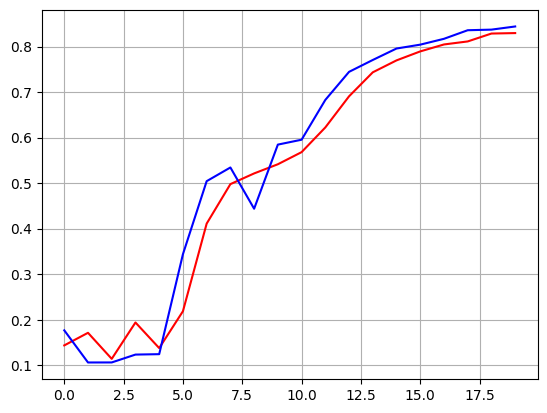

In [18]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

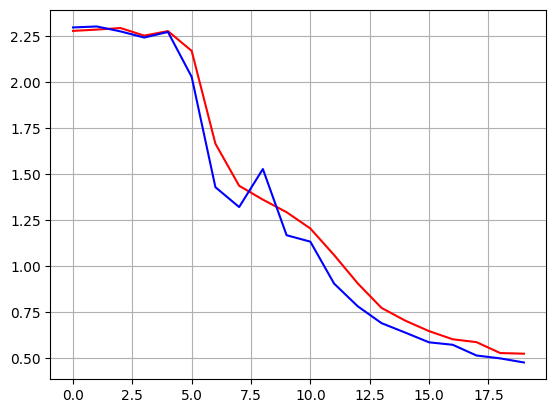

In [19]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

In [20]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))
scores = model.evaluate(x_Train_norm, y_TrainOneHot)
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1] * 100.0))

313/313 [==============================] - 4s 12ms/step - loss: 0.4832 - accuracy: 0.8403
	[Info] Accuracy of testing data = 84.0%
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4900 - accuracy: 0.8395
	[Info] Accuracy of training data = 84.0%


In [21]:
# 預測(prediction)
X = x_Test_norm
# np.argmax找出最佳的數字softmax
predictions = np.argmax(model.predict(X), axis = 1)
model.predict(X)[:3]

array([[2.4247602e-06, 1.0976355e-03, 7.7857804e-03, 8.5399236e-04,
        1.5418961e-10, 1.6904614e-04, 1.5076537e-12, 9.9002516e-01,
        2.9644086e-06, 6.3031686e-05],
       [5.4244641e-03, 1.2872971e-02, 5.8986264e-01, 3.3801955e-01,
        5.0692837e-09, 5.0363705e-02, 3.0293284e-04, 6.5015861e-06,
        3.1286553e-03, 1.8633087e-05],
       [1.5332125e-03, 9.8655474e-01, 1.5873138e-05, 4.0741647e-06,
        9.9362682e-05, 2.6298693e-04, 1.7938436e-03, 1.0976536e-06,
        9.6736038e-03, 6.1212544e-05]], dtype=float32)

In [22]:
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test_org[0:20])

prediction: [7 2 1 0 4 1 4 9 2 9 0 6 9 0 1 5 9 7 5 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


## CNN_Mnist_Epochs_20

In [23]:
# 導入函式庫
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow import keras

# 固定亂數種子，使每次執行產生的亂數都一樣
np.random.seed(1337)

# 定義分類數量
num_classes = 10

# 定義圖像寬、高
img_rows, img_cols = 28, 28

# 載入MNIST資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test_org) = mnist.load_data()

input_shape = (img_rows, img_cols, 1)

# 建立簡單的線性執行的模型
model = Sequential()
# 建立卷積層，filter=32，即output space的深度, Kernal Size=3x3, activation function採用relu
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape))
# 建立卷積層，filter=64，即output size, Kernal Size: 3x3, activation function採用relu
model.add(Conv2D(64, (3, 3), activation = 'relu'))
# 建立池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size = (2, 2)))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例=0.25
model.add(Dropout(0.25))
# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model.add(Flatten())
# 全連接層：128個output
model.add(Dense(128, activation = 'relu'))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例=0.5
model.add(Dropout(0.5))
# 使用softmax activation function，將結果分類
model.add(Dense(num_classes, activation = 'softmax'))

# 選擇損失函數、優化方法及成效衡量方式
LR = 0.001
adam = keras.optimizers.Adam(learning_rate = LR)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy']) 

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               1179776   
                                                      

In [24]:
# 將training的label進行one-hot encoding
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test_org) 

# 將training的input資料轉為二維
X_train_2D = X_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0 
X_test_2D = X_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0

x_Train_norm = X_train_2D / 255
x_Test_norm = X_test_2D / 255

# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = x_Train_norm, y = y_TrainOneHot, 
                          validation_split = 0.2, epochs = 20, batch_size = 800, verbose = 1) 

Epoch 1/20
60/60 [==============================] - 34s 552ms/step - loss: 2.2382 - accuracy: 0.2026 - val_loss: 1.9072 - val_accuracy: 0.5605
Epoch 2/20
60/60 [==============================] - 45s 750ms/step - loss: 1.2268 - accuracy: 0.6254 - val_loss: 0.5688 - val_accuracy: 0.8599
Epoch 3/20
60/60 [==============================] - 47s 784ms/step - loss: 0.6733 - accuracy: 0.7911 - val_loss: 0.3848 - val_accuracy: 0.8932
Epoch 4/20
60/60 [==============================] - 51s 844ms/step - loss: 0.5447 - accuracy: 0.8332 - val_loss: 0.3228 - val_accuracy: 0.9091
Epoch 5/20
60/60 [==============================] - 45s 742ms/step - loss: 0.4838 - accuracy: 0.8537 - val_loss: 0.2847 - val_accuracy: 0.9163
Epoch 6/20
60/60 [==============================] - 43s 712ms/step - loss: 0.4414 - accuracy: 0.8674 - val_loss: 0.2619 - val_accuracy: 0.9200
Epoch 7/20
60/60 [==============================] - 45s 746ms/step - loss: 0.4109 - accuracy: 0.8769 - val_loss: 0.2392 - val_accuracy: 0.9284

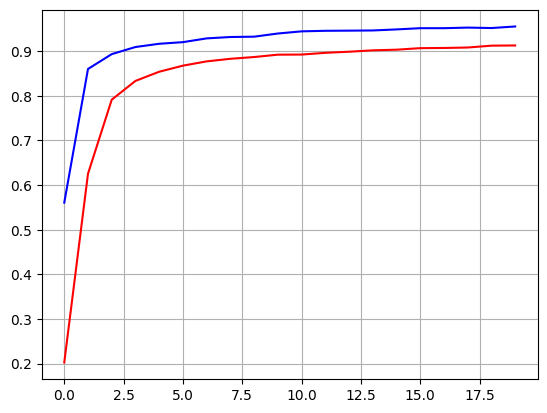

In [25]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

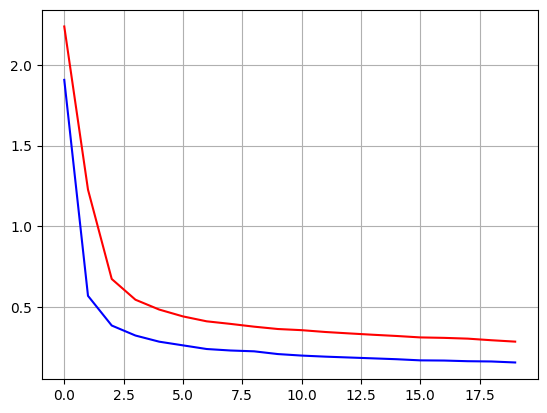

In [26]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

In [27]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))  
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1] * 100.0)) 

313/313 [==============================] - 4s 11ms/step - loss: 0.1502 - accuracy: 0.9554
	[Info] Accuracy of testing data = 95.5%
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1521 - accuracy: 0.9543
	[Info] Accuracy of training data = 95.4%


In [28]:
# 預測(prediction)
X = x_Test_norm
# np.argmax找出最佳的數字softmax
predictions = np.argmax(model.predict(X), axis = 1)
model.predict(X)[:3]

array([[4.3822599e-08, 7.3134510e-10, 6.6239231e-06, 5.5777669e-05,
        2.1338391e-10, 1.4175022e-07, 4.5708148e-13, 9.9990177e-01,
        2.5123095e-08, 3.5578072e-05],
       [1.1283949e-05, 1.3137796e-05, 9.9867487e-01, 1.2318124e-03,
        2.1064996e-14, 1.2672917e-05, 5.3235527e-07, 4.2621167e-11,
        5.5722034e-05, 4.9380364e-14],
       [6.9775524e-07, 9.9771702e-01, 7.6594518e-04, 4.9377215e-04,
        1.5108390e-05, 8.6440858e-05, 1.5431426e-04, 3.0848241e-04,
        4.5708049e-04, 1.1917602e-06]], dtype=float32)

In [29]:
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test_org[0:20])

prediction: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


## DNN_Mnist_Epochs_20

In [30]:
# 導入函式庫
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense, Flatten
from tensorflow import keras

# 固定亂數種子，使每次執行產生的亂數都一樣
np.random.seed(1337)

# 載入MNIST資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test_org) = mnist.load_data()

# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer)有256個輸出變數
model.add(Dense(units = 256, input_dim = 784, kernel_initializer = 'normal', activation = 'relu')) 
# model.add(Dense(units=64, input_dim=784, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 選擇損失函數、優化方法及成效衡量方式
LR = 0.001
adam = keras.optimizers.Adam(learning_rate = LR)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy']) 

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
# 將training的label進行one-hot encoding
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test_org) 

# 將training的input資料轉為二維
X_train_2D = X_train.reshape(60000, 28 * 28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28 * 28).astype('float32')  

x_Train_norm = X_train_2D / 255
x_Test_norm = X_test_2D / 255

# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = x_Train_norm, y = y_TrainOneHot, 
                          validation_split = 0.2, epochs = 20, batch_size = 800, verbose = 1)  

Epoch 1/20
60/60 [==============================] - 1s 13ms/step - loss: 0.7799 - accuracy: 0.8098 - val_loss: 0.3313 - val_accuracy: 0.9067
Epoch 2/20
60/60 [==============================] - 1s 13ms/step - loss: 0.3019 - accuracy: 0.9161 - val_loss: 0.2492 - val_accuracy: 0.9327
Epoch 3/20
60/60 [==============================] - 1s 10ms/step - loss: 0.2380 - accuracy: 0.9338 - val_loss: 0.2094 - val_accuracy: 0.9438
Epoch 4/20
60/60 [==============================] - 1s 9ms/step - loss: 0.1969 - accuracy: 0.9447 - val_loss: 0.1814 - val_accuracy: 0.9497
Epoch 5/20
60/60 [==============================] - 1s 11ms/step - loss: 0.1660 - accuracy: 0.9527 - val_loss: 0.1605 - val_accuracy: 0.9560
Epoch 6/20
60/60 [==============================] - 0s 7ms/step - loss: 0.1431 - accuracy: 0.9603 - val_loss: 0.1443 - val_accuracy: 0.9590
Epoch 7/20
60/60 [==============================] - 1s 12ms/step - loss: 0.1248 - accuracy: 0.9652 - val_loss: 0.1375 - val_accuracy: 0.9622
Epoch 8/20
60/6

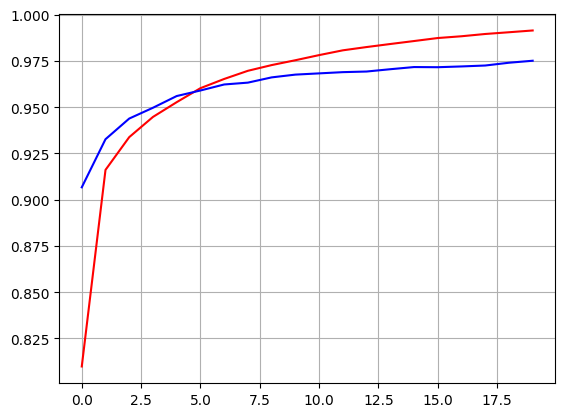

In [32]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

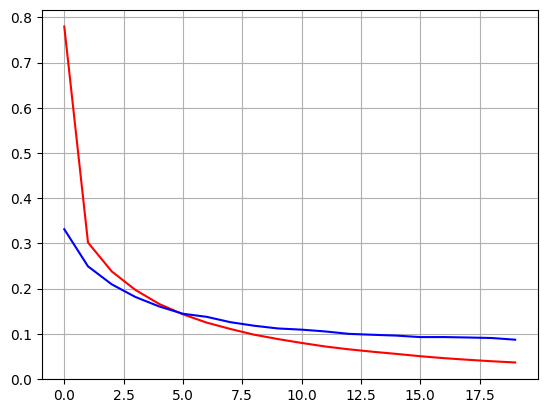

In [33]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

In [34]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))
scores = model.evaluate(x_Train_norm, y_TrainOneHot)
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1] * 100.0))

313/313 [==============================] - 1s 4ms/step - loss: 0.0780 - accuracy: 0.9763
	[Info] Accuracy of testing data = 97.6%
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0428 - accuracy: 0.9895
	[Info] Accuracy of training data = 99.0%


In [35]:
# 預測(prediction)
X = x_Test_norm
predictions = np.argmax(model.predict(X), axis = 1)
model.predict(X)[:3]

array([[1.67050507e-06, 1.36903280e-08, 8.75499536e-05, 1.54031650e-03,
        5.76535797e-09, 1.50652596e-07, 8.20065960e-11, 9.98359859e-01,
        2.36999063e-06, 8.13849965e-06],
       [5.01383646e-09, 3.79476915e-05, 9.99952674e-01, 5.85477164e-06,
        7.91281577e-15, 9.41870269e-07, 6.08571440e-07, 1.01628206e-13,
        2.06731352e-06, 4.51854063e-14],
       [2.88564243e-05, 9.93155658e-01, 1.71786186e-03, 1.45453552e-04,
        2.60355562e-04, 1.18933531e-04, 1.40778633e-04, 1.78302499e-03,
        2.61885067e-03, 3.01330856e-05]], dtype=float32)

In [36]:
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test_org[0:20])

prediction: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


## RNN_Bidirectional_Mnist

In [37]:
# 導入函式庫
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense, Bidirectional
# from keras.optimizers import Adam

# 固定亂數種子，使每次執行產生的亂數都一樣
np.random.seed(1337)

# 載入MNIST資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test_org) = mnist.load_data()

# 將training的input資料轉為三維，並normalize把顏色控制在0 ~ 1之間
X_train = X_train.reshape(-1, 28, 28) / 255.      
X_test = X_test.reshape(-1, 28, 28) / 255.
y_train = np_utils.to_categorical(y_train, num_classes = 10)
y_test = np_utils.to_categorical(y_test_org, num_classes = 10)

# 建立簡單的線性執行的模型
model = Sequential()
# 加RNN隱藏層(hidden layer)
model.add(Bidirectional(SimpleRNN(
    # 如果後端使用tensorflow，batch_input_shape的batch_size需設為None.
    # 否則執行model.evaluate()會有錯誤產生.
    batch_input_shape = (None, 28, 28), 
    units = 50,
    unroll = True,)))

# 加入output層
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 選擇損失函數、優化方法及成效衡量方式
# LR = 0.001
# adam = Adam(LR)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 

# 一批訓練多少張圖片
BATCH_SIZE = 50
BATCH_INDEX = 0

# 訓練模型4001次
for step in range(1, 4001):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch = X_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :, :]
    Y_batch = y_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :]
    # 逐批訓練
    loss = model.train_on_batch(X_batch, Y_batch)
    BATCH_INDEX += BATCH_SIZE
    BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

    # 每500批，顯示測試的準確率
    if step % 500 == 0:
        # 模型評估
        loss, accuracy = model.evaluate(X_test, y_test, batch_size = y_test.shape[0], 
            verbose = False)
        print("test loss: {}  test accuracy: {}".format(loss,accuracy))

test loss: 0.43793192505836487  test accuracy: 0.8647000193595886
test loss: 0.31712061166763306  test accuracy: 0.9061999917030334
test loss: 0.27891480922698975  test accuracy: 0.9190999865531921
test loss: 0.23417721688747406  test accuracy: 0.9337999820709229
test loss: 0.18997697532176971  test accuracy: 0.9466000199317932
test loss: 0.22004887461662292  test accuracy: 0.9381999969482422
test loss: 0.17997455596923828  test accuracy: 0.9478999972343445
test loss: 0.1659843921661377  test accuracy: 0.9488999843597412


In [38]:
# 預測(prediction)
import numpy as np
X = X_test[:100, :]
predictions = model.predict(X)
# get prediction result
print('actual :', y_test_org[:100])
print('predict:', np.argmax(predictions, axis = 1))

actual : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
predict: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 2 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 4 3 1 4 1 7 6 9]


In [39]:
(y_test_org[:100] == np.argmax(predictions, axis = 1)).sum() / 100 * 100

97.0

## How to Convert a Time Series to a Supervised Learning Problem in Python with ML

In [1]:
!pip install pandas_datareader

     ------------------------------------ 109.5/109.5 kB 632.0 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import datetime
import pandas as pd
import pandas_datareader.data as web
# 第一筆數據
predict_days = 6 # 用過去6天預測下一天
start_date = datetime.datetime(1999, 1, 1)
end_date = datetime.datetime(2023, 4, 20)
df = web.DataReader('2330.tw', start_date, end_date)
data = df.reset_index()
data['TickerId']   = '2330'
data['TickerName'] = '台積電'
data[-9:]

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,TickerId,TickerName
5800,2023-04-07,535.0,535.0,529.0,531.0,531.0,8557482,2330,台積電
5801,2023-04-10,533.0,533.0,528.0,529.0,529.0,7435151,2330,台積電
5802,2023-04-11,522.0,527.0,522.0,524.0,524.0,22675697,2330,台積電
5803,2023-04-12,523.0,524.0,517.0,520.0,520.0,23816473,2330,台積電
5804,2023-04-13,515.0,517.0,510.0,510.0,510.0,25536889,2330,台積電
5805,2023-04-14,516.0,520.0,513.0,516.0,516.0,18072504,2330,台積電
5806,2023-04-17,519.0,520.0,514.0,520.0,520.0,14634287,2330,台積電
5807,2023-04-18,518.0,520.0,514.0,515.0,515.0,15168888,2330,台積電
5808,2023-04-19,517.0,518.0,509.0,510.0,510.0,21123233,2330,台積電


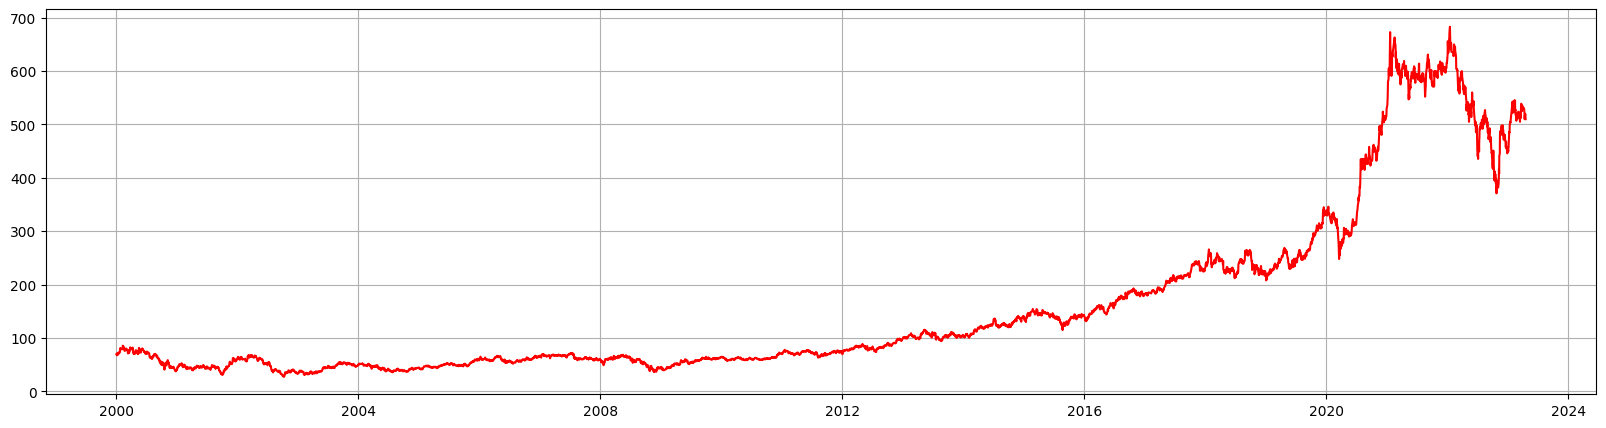

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 5))
plt.plot(data['Date'], data['Close'], color = 'red')
plt.grid()
plt.show()

In [ ]:
# 以下為X, y資料產生方式

In [38]:
# 前面天數會有NaN
tsmc = data[['Close']][:100]
tsmc['t-5'] = tsmc.Close.shift(5)
tsmc['t-4'] = tsmc.Close.shift(4)
tsmc['t-3'] = tsmc.Close.shift(3)
tsmc['t-2'] = tsmc.Close.shift(2)
tsmc['t-1'] = tsmc.Close.shift(1)
tsmc['t-0'] = tsmc['Close']
tsmc.drop(columns = 'Close', inplace = True)
tsmc

,t-5,t-4,t-3,t-2,t-1,t-0
0,NaN,NaN,NaN,NaN,NaN,69.649033
1,NaN,NaN,NaN,NaN,69.649033,71.214043
2,NaN,NaN,NaN,69.649033,71.214043,69.649033
3,NaN,NaN,69.649033,71.214043,69.649033,67.692490
4,NaN,69.649033,71.214043,69.649033,67.692490,70.040192
...,...,...,...,...,...,...
95,75.518280,73.561737,70.040192,72.387894,70.619270,74.876274
96,73.561737,70.040192,72.387894,70.619270,74.876274,79.634438
97,70.040192,72.387894,70.619270,74.876274,79.634438,81.638123
98,72.387894,70.619270,74.876274,79.634438,81.638123,81.136963


In [39]:
# 後面天數會有NaN
tsmc = data[['Close']][:100]
tsmc['Close+1'] = tsmc.Close.shift(-1)
tsmc['Close+2'] = tsmc.Close.shift(-2)
tsmc['Close+3'] = tsmc.Close.shift(-3)
tsmc['Close+4'] = tsmc.Close.shift(-4)
tsmc['Close+5'] = tsmc.Close.shift(-5)
tsmc[-10:]

,Close,Close+1,Close+2,Close+3,Close+4,Close+5
90,75.518280,73.561737,70.040192,72.387894,70.619270,74.876274
91,73.561737,70.040192,72.387894,70.619270,74.876274,79.634438
92,70.040192,72.387894,70.619270,74.876274,79.634438,81.638123
93,72.387894,70.619270,74.876274,79.634438,81.638123,81.136963
94,70.619270,74.876274,79.634438,81.638123,81.136963,79.133751
95,74.876274,79.634438,81.638123,81.136963,79.133751,NaN
96,79.634438,81.638123,81.136963,79.133751,NaN,NaN
97,81.638123,81.136963,79.133751,NaN,NaN,NaN
98,81.136963,79.133751,NaN,NaN,NaN,NaN
99,79.133751,NaN,NaN,NaN,NaN,NaN


In [40]:
# 樣本SAMPLE
from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t-5'] = df.t.shift(5)
df['t-4'] = df.t.shift(4)
df['t-3'] = df.t.shift(3)
df['t-2'] = df.t.shift(2)
df['t-1'] = df.t.shift(1)
df['t-0'] = df['t']
df.drop(columns = 't', inplace = True)
df

,t-5,t-4,t-3,t-2,t-1,t-0
0,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,0.0,1
2,NaN,NaN,NaN,0.0,1.0,2
3,NaN,NaN,0.0,1.0,2.0,3
4,NaN,0.0,1.0,2.0,3.0,4
5,0.0,1.0,2.0,3.0,4.0,5
6,1.0,2.0,3.0,4.0,5.0,6
7,2.0,3.0,4.0,5.0,6.0,7
8,3.0,4.0,5.0,6.0,7.0,8
9,4.0,5.0,6.0,7.0,8.0,9


In [41]:
# 樣本變更台積電數據，製作成前五天預測下一天 
from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t+1'] = df.t.shift(-1)
df['t+2'] = df.t.shift(-2)
df

,t,t+1,t+2
0,0,1.0,2.0
1,1,2.0,3.0
2,2,3.0,4.0
3,3,4.0,5.0
4,4,5.0,6.0
5,5,6.0,7.0
6,6,7.0,8.0
7,7,8.0,9.0
8,8,9.0,NaN
9,9,NaN,NaN


In [48]:
# 自己寫一個函數
# series_to_supervised()
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
    data: Sequence of observations as a list or NumPy array.
    n_in: Number of lag observations as input (X).
    n_out: Number of observations as output (y).
    dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
    Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis = 1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace = True)
    return agg

# 驗證台積電數據
# 前面幾次的數據n_in去預測後面幾次的數據n_out
values = data.Close.tolist()
data2 = series_to_supervised(values, n_in = predict_days, n_out = 1, dropnan = True) 
# *************優化過去幾天，預測下一天

In [49]:
data2[-9:]

,var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
5800,531.0,525.0,530.0,535.0,533.0,530.0,531.0
5801,525.0,530.0,535.0,533.0,530.0,531.0,529.0
5802,530.0,535.0,533.0,530.0,531.0,529.0,524.0
5803,535.0,533.0,530.0,531.0,529.0,524.0,520.0
5804,533.0,530.0,531.0,529.0,524.0,520.0,510.0
5805,530.0,531.0,529.0,524.0,520.0,510.0,516.0
5806,531.0,529.0,524.0,520.0,510.0,516.0,520.0
5807,529.0,524.0,520.0,510.0,516.0,520.0,515.0
5808,524.0,520.0,510.0,516.0,520.0,515.0,510.0


In [50]:
# 取出X , y
X = data2.iloc[:, [0,1,2,3,4,5]].values
y = data2.iloc[:, [-1]].values

# 資料切割 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4642, 6), (4642, 1), (1161, 6), (1161, 1))

In [51]:
# 建置模型
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [52]:
print(reg.predict(X_test)[-3:])
print('-' * 50)
print(y_test[-3:])

[[97.16584322]
 [89.95280982]
 [47.49155766]]
--------------------------------------------------
[[96.80000305]
 [90.59999847]
 [47.07951355]]


In [53]:
# 預測所有數據
pre_Close = reg.predict(X)
data_plot = data[:-1 * predict_days].copy() # ********根據優化過去幾天，預測下一天而變動
data_plot['pre_Close'] = pre_Close
data_plot[-6:]

,Date,Open,High,Low,Close,Adj Close,Volume,TickerId,TickerName,pre_Close
5797,2023-03-30,536.0,537.0,531.0,535.0,535.0,19201564,2330,台積電,523.961258
5798,2023-03-31,538.0,538.0,532.0,533.0,533.0,23558838,2330,台積電,520.118672
5799,2023-04-06,530.0,531.0,526.0,530.0,530.0,25423363,2330,台積電,510.310786
5800,2023-04-07,535.0,535.0,529.0,531.0,531.0,8557482,2330,台積電,516.274360
5801,2023-04-10,533.0,533.0,528.0,529.0,529.0,7435151,2330,台積電,520.895845
5802,2023-04-11,522.0,527.0,522.0,524.0,524.0,22675697,2330,台積電,514.683850


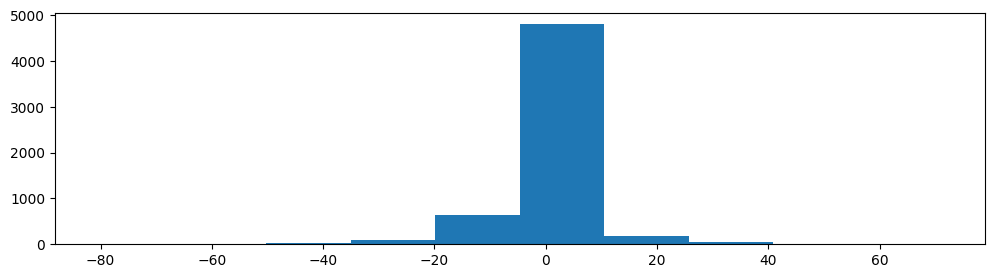

In [54]:
# 預測與實際的金額差異
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 3))
plt.hist(data_plot.Close - data_plot.pre_Close)
plt.show()

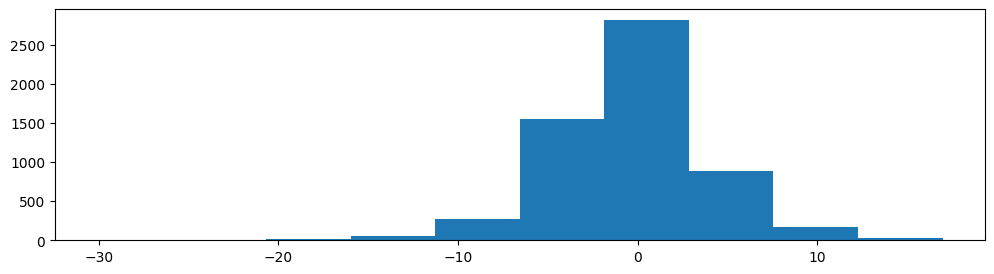

In [55]:
# 預測與實際的金額差異（%）
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 3))
plt.hist((data_plot.Close - data_plot.pre_Close) / data_plot.Close * 100)
plt.show()

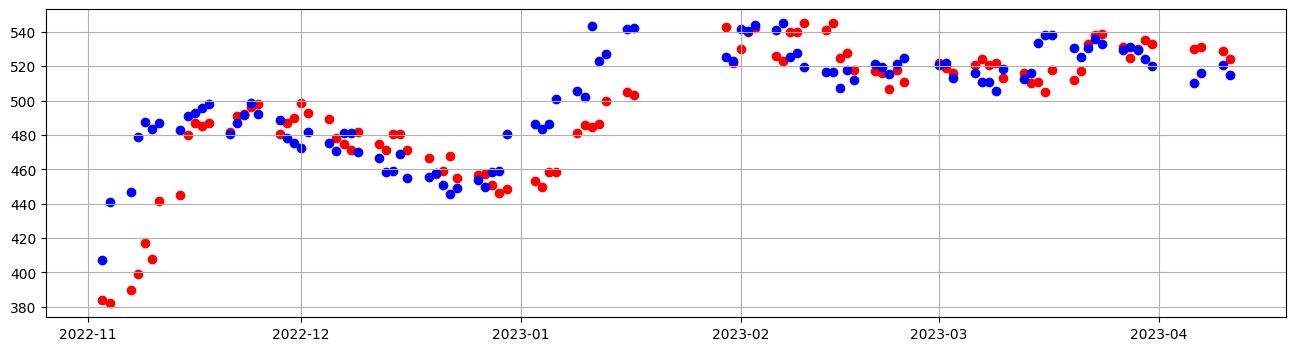

In [56]:
# 檢視預測狀況
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
last_days = -100
plt.figure(figsize = (16,4))
plt.grid()
plt.scatter(pd.to_datetime(data_plot[last_days:].Date), data_plot[last_days:].Close, color = 'red')

plt.scatter(pd.to_datetime(data_plot[last_days:].Date), data_plot[last_days:].pre_Close, color = 'blue')
plt.show()

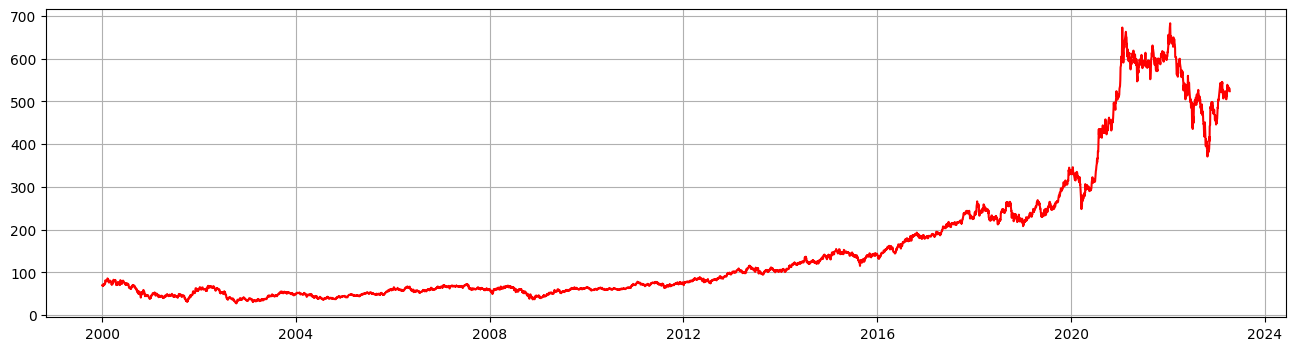

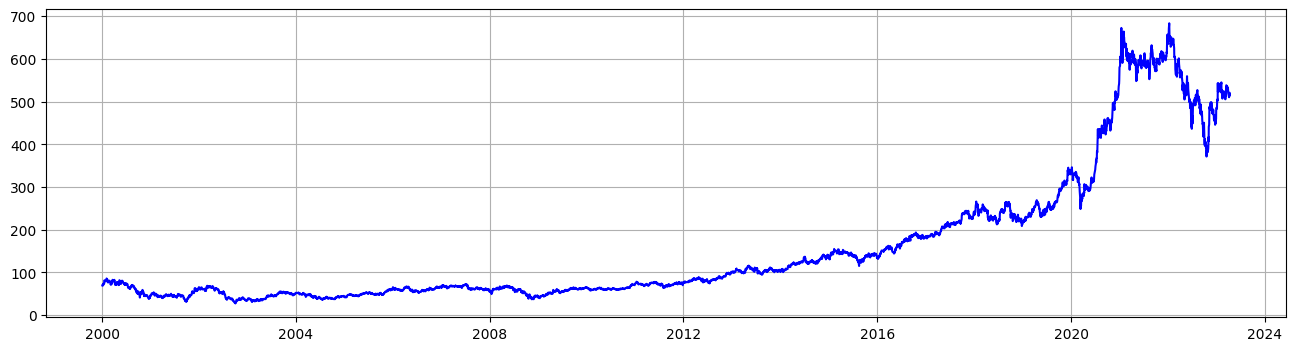

In [57]:
# 檢視預測狀況
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), data_plot.Close, color = 'red')
plt.show()

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), data_plot.pre_Close, color = 'blue')
plt.show()

In [58]:
# mse 
# mean sqr error
# (predict - truth) ** 2 / n
# 這是預測數據

data_plot

,Date,Open,High,Low,Close,Adj Close,Volume,TickerId,TickerName,pre_Close
0,2000-01-04,69.649033,69.649033,68.475182,69.649033,35.203033,200662336736,2330,台積電,69.093241
1,2000-01-05,69.649033,71.214043,68.866341,71.214043,35.994034,402466805912,2330,台積電,70.694997
2,2000-01-06,70.822884,71.214043,69.649033,69.649033,35.203033,197545715802,2330,台積電,69.782342
3,2000-01-07,67.301331,68.475182,66.518639,67.692490,34.214127,235270344752,2330,台積電,71.159930
4,2000-01-10,69.649033,70.431351,68.475182,70.040192,35.400738,276171685539,2330,台積電,73.341843
...,...,...,...,...,...,...,...,...,...,...
5798,2023-03-31,538.000000,538.000000,532.000000,533.000000,533.000000,23558838,2330,台積電,520.118672
5799,2023-04-06,530.000000,531.000000,526.000000,530.000000,530.000000,25423363,2330,台積電,510.310786
5800,2023-04-07,535.000000,535.000000,529.000000,531.000000,531.000000,8557482,2330,台積電,516.274360
5801,2023-04-10,533.000000,533.000000,528.000000,529.000000,529.000000,7435151,2330,台積電,520.895845


## Time Series to ML_Forecast

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()
predict_days = 6
df = pdr.get_data_yahoo('2330.tw', start = '1999-01-01', end = '2023-04-20')
data = df.reset_index()
data['TickerId']   = '2330'
data['TickerName'] = '台積電'
data[-9:]

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,TickerId,TickerName
5800,2023-04-07,535.0,535.0,529.0,531.0,531.0,8557482,2330,台積電
5801,2023-04-10,533.0,533.0,528.0,529.0,529.0,7435151,2330,台積電
5802,2023-04-11,522.0,527.0,522.0,524.0,524.0,22675697,2330,台積電
5803,2023-04-12,523.0,524.0,517.0,520.0,520.0,23816473,2330,台積電
5804,2023-04-13,515.0,517.0,510.0,510.0,510.0,25536889,2330,台積電
5805,2023-04-14,516.0,520.0,513.0,516.0,516.0,18072504,2330,台積電
5806,2023-04-17,519.0,520.0,514.0,520.0,520.0,14634287,2330,台積電
5807,2023-04-18,518.0,520.0,514.0,515.0,515.0,15168888,2330,台積電
5808,2023-04-19,517.0,518.0,509.0,510.0,510.0,21123233,2330,台積電


In [2]:
# 前面天數會有NaN
tsmc = data[['Close']][:100]
tsmc['t-5'] = tsmc.Close.shift(5)
tsmc['t-4'] = tsmc.Close.shift(4)
tsmc['t-3'] = tsmc.Close.shift(3)
tsmc['t-2'] = tsmc.Close.shift(2)
tsmc['t-1'] = tsmc.Close.shift(1)
tsmc['t-0'] = tsmc['Close']
tsmc.drop(columns = 'Close', inplace = True)
tsmc

,t-5,t-4,t-3,t-2,t-1,t-0
0,NaN,NaN,NaN,NaN,NaN,69.649033
1,NaN,NaN,NaN,NaN,69.649033,71.214043
2,NaN,NaN,NaN,69.649033,71.214043,69.649033
3,NaN,NaN,69.649033,71.214043,69.649033,67.692490
4,NaN,69.649033,71.214043,69.649033,67.692490,70.040192
...,...,...,...,...,...,...
95,75.518280,73.561737,70.040192,72.387894,70.619270,74.876274
96,73.561737,70.040192,72.387894,70.619270,74.876274,79.634438
97,70.040192,72.387894,70.619270,74.876274,79.634438,81.638123
98,72.387894,70.619270,74.876274,79.634438,81.638123,81.136963


In [3]:
# 後面天數會有NaN
tsmc = data[['Close']][:100]
tsmc['Close+1'] = tsmc.Close.shift(-1)
tsmc['Close+2'] = tsmc.Close.shift(-2)
tsmc['Close+3'] = tsmc.Close.shift(-3)
tsmc['Close+4'] = tsmc.Close.shift(-4)
tsmc['Close+5'] = tsmc.Close.shift(-5)
tsmc[:]

,Close,Close+1,Close+2,Close+3,Close+4,Close+5
0,69.649033,71.214043,69.649033,67.692490,70.040192,68.866341
1,71.214043,69.649033,67.692490,70.040192,68.866341,70.822884
2,69.649033,67.692490,70.040192,68.866341,70.822884,69.649033
3,67.692490,70.040192,68.866341,70.822884,69.649033,71.214043
4,70.040192,68.866341,70.822884,69.649033,71.214043,73.170578
...,...,...,...,...,...,...
95,74.876274,79.634438,81.638123,81.136963,79.133751,NaN
96,79.634438,81.638123,81.136963,79.133751,NaN,NaN
97,81.638123,81.136963,79.133751,NaN,NaN,NaN
98,81.136963,79.133751,NaN,NaN,NaN,NaN


In [4]:
# 樣本SAMPLE
from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t-5'] = df.t.shift(5)
df['t-4'] = df.t.shift(4)
df['t-3'] = df.t.shift(3)
df['t-2'] = df.t.shift(2)
df['t-1'] = df.t.shift(1)
df['t-0'] = df['t']
df.drop(columns = 't', inplace = True)
df

,t-5,t-4,t-3,t-2,t-1,t-0
0,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,0.0,1
2,NaN,NaN,NaN,0.0,1.0,2
3,NaN,NaN,0.0,1.0,2.0,3
4,NaN,0.0,1.0,2.0,3.0,4
5,0.0,1.0,2.0,3.0,4.0,5
6,1.0,2.0,3.0,4.0,5.0,6
7,2.0,3.0,4.0,5.0,6.0,7
8,3.0,4.0,5.0,6.0,7.0,8
9,4.0,5.0,6.0,7.0,8.0,9


In [5]:
# 樣本變更TSMC數據，製作成前五天預測下一天 
from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t+1'] = df.t.shift(-1)
df['t+2'] = df.t.shift(-2)
df

,t,t+1,t+2
0,0,1.0,2.0
1,1,2.0,3.0
2,2,3.0,4.0
3,3,4.0,5.0
4,4,5.0,6.0
5,5,6.0,7.0
6,6,7.0,8.0
7,7,8.0,9.0
8,8,9.0,NaN
9,9,NaN,NaN


In [6]:
# series_to_supervised()
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
    data: Sequence of observations as a list or NumPy array.
    n_in: Number of lag observations as input (X).
    n_out: Number of observations as output (y).
    dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
    Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis = 1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace = True)
    return agg

# 驗證TSMC數據
# 前面幾次的數據n_in去預測後面幾次的數據n_out
values = data.Close.tolist()
data2 = series_to_supervised(values, n_in = predict_days, n_out = 1, dropnan = True) 
# *************優化過去幾天，預測下一天

In [7]:
# 取出X , y
X = data2.iloc[:, :-1].values
y = data2.iloc[:, [-1]].values

# 資料切割 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4642, 6), (4642, 1), (1161, 6), (1161, 1))

In [8]:
# 建置模型
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [11]:
print(reg.predict(X_test)[:5])
print('-' * 50)
print(y_test[:5])

[[ 47.15378441]
 [242.09698169]
 [ 36.90215128]
 [ 71.25357616]
 [176.34198167]]
--------------------------------------------------
[[ 48.10773087]
 [244.5       ]
 [ 37.83764267]
 [ 70.68836212]
 [174.5       ]]


In [12]:
# 預測所有數據
pre_Close = reg.predict(X)
data_plot = data[:-1 * predict_days].copy()
data_plot['pre_Close'] = pre_Close
data_plot[-3:]

,Date,Open,High,Low,Close,Adj Close,Volume,TickerId,TickerName,pre_Close
5800,2023-04-07,535.0,535.0,529.0,531.0,531.0,8557482,2330,台積電,516.274360
5801,2023-04-10,533.0,533.0,528.0,529.0,529.0,7435151,2330,台積電,520.895845
5802,2023-04-11,522.0,527.0,522.0,524.0,524.0,22675697,2330,台積電,514.683850


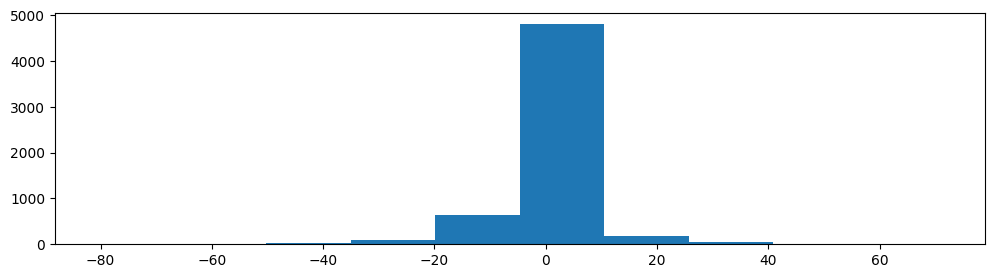

In [13]:
# 預測與實際的金額差異
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 3))
plt.hist(data_plot.Close - data_plot.pre_Close)
plt.show()

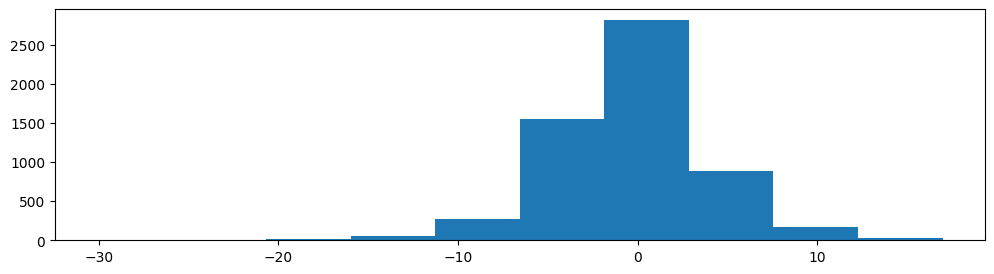

In [14]:
# 預測與實際的金額差異
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 3))
plt.hist((data_plot.Close - data_plot.pre_Close) / data_plot.Close * 100)
plt.show()

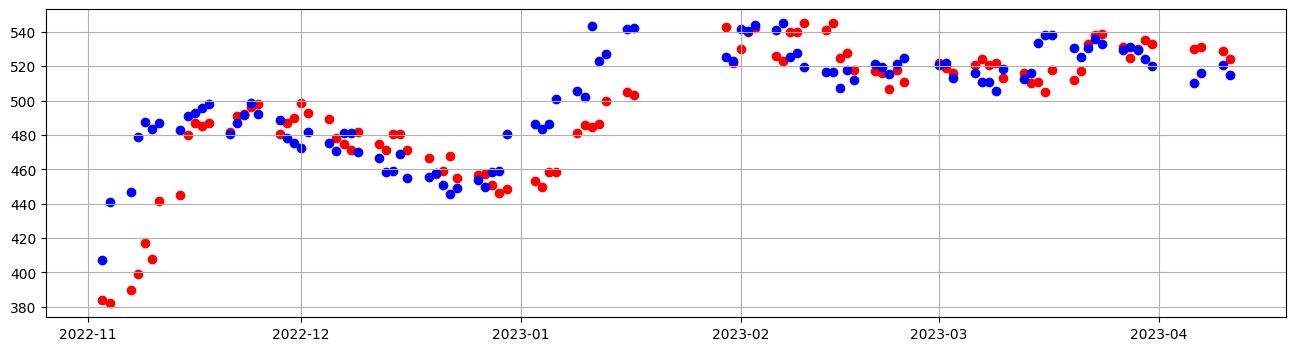

In [15]:
# 檢視預測狀況
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
last_days = -100
plt.figure(figsize = (16, 4))
plt.grid()
plt.scatter(pd.to_datetime(data_plot[last_days:].Date), data_plot[last_days:].Close, color = 'red')
plt.scatter(pd.to_datetime(data_plot[last_days:].Date), data_plot[last_days:].pre_Close, color = 'blue')

plt.show()

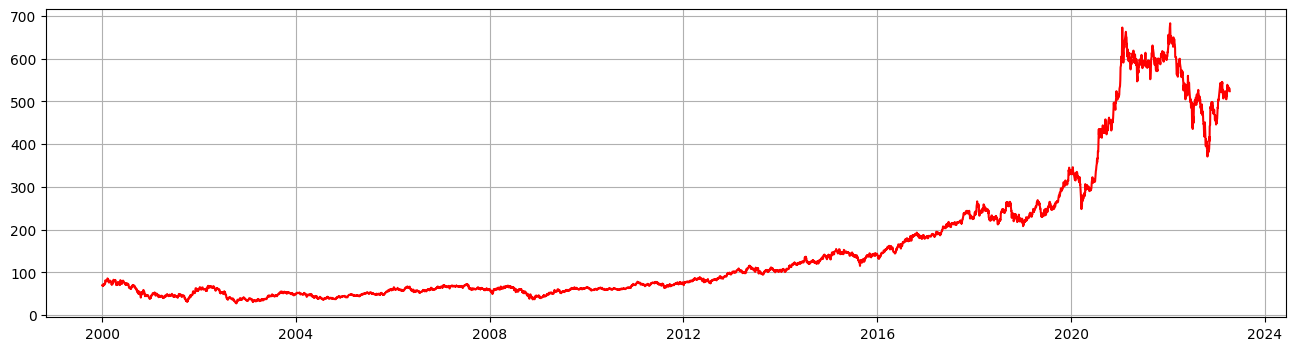

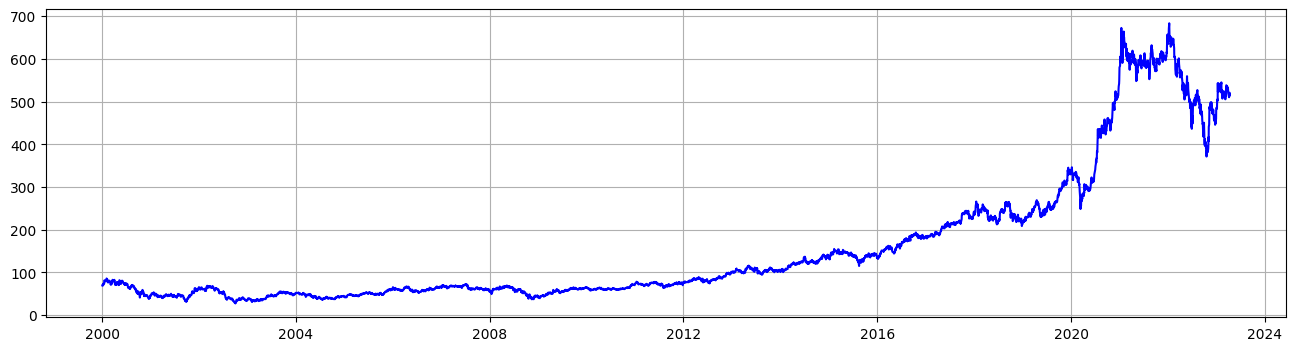

In [16]:
# 檢視預測狀況
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), data_plot.Close, color = 'red')
plt.show()

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), data_plot.pre_Close, color = 'blue')
plt.show()

In [17]:
# MSE
# (predict - truth) ** 2 / n
# 這是預測數據（使用Machine Learning的部分）
# MSE重要數據
sum((data_plot.Close - data_plot.pre_Close) ** 2) / data_plot.shape[0]

66.65199160702355

In [18]:
# 最後一筆數據
X[-1] # 2022-04-12 ~ 2022-04-19 --> 2022-04-20

array([524., 520., 510., 516., 520., 515.])

In [19]:
# 最後一筆數據
y[-1] # 2022-04-12 ~ 2022-04-19 --> 2022-04-20

array([510.])

In [20]:
data.Date[-1:].dt.strftime("%Y%m%d").values[0] # 資料最後一天
# data[-1:]
# from datetime import timedelta
# (data.Date[-1:] + timedelta(days=1)).dt.strftime("%Y-%m-%d").values[0]

'20230419'

In [21]:
data.Date[-1:].dt.strftime("%Y%m%d").values[0] # 資料最後一天
from datetime import timedelta
(data.Date[-1:] + timedelta(days = 1)).dt.strftime("%Y-%m-%d").values[0] # 最後一天下一天

'2023-04-20'

In [26]:
# 預測下個十天TSMC股價
import numpy as np

future_days, future_price = [], []

# 數據最後一天數據使用model去預測
next_data = X[-1]
next_day = reg.predict(X[-1].reshape(1, -1))
print(next_day[0], data.Date[-1:].dt.strftime("%Y-%m-%d").values[0])

# 再預測下N天
for i in range(1, 90, 1):
    next_data = np.hstack((next_data , next_day[0]) )[-1 * predict_days:]
    next_day = reg.predict(next_data.reshape(1,-1))
    future_days.append((data.Date[-1:] + timedelta(days = i)).dt.strftime("%Y-%m-%d").values[0])
    future_price.append(next_day[0][0])
    # print(next_day[0], (data.Date[-1:] + timedelta(days = i)).dt.strftime("%Y-%m-%d").values[0])

[514.68385036] 2023-04-19


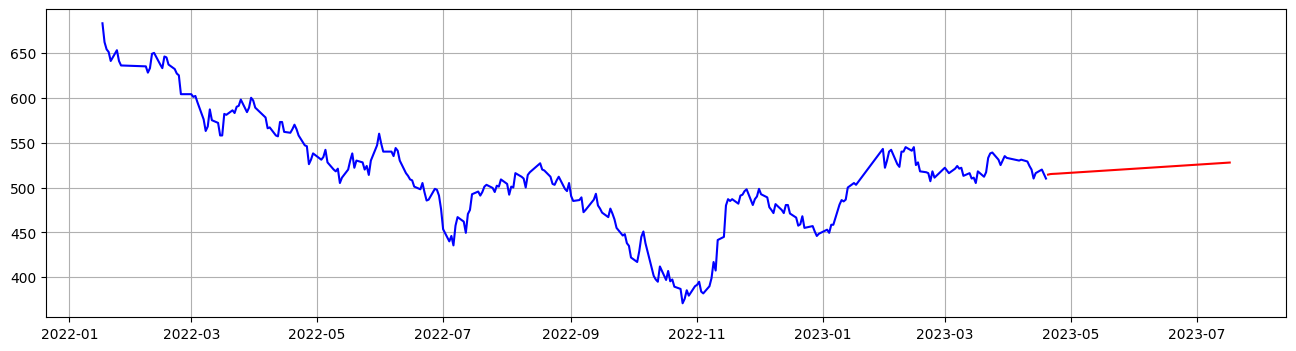

In [27]:
# predict next N days
# draw plot

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data.Date)[-300:], data.Close[-300:], color = 'blue')
plt.plot(pd.to_datetime(future_days), future_price, color = 'red')
plt.show()